### Do it! 실습 | 직업 변수 검토 및 전처리하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 불러오기
raw_welfare = pd.read_spss('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

In [3]:
welfare = welfare.rename(
    columns = {
        'h14_g3' : 'sex', # 성별
        'h14_g4' : 'birth', # 태어난 연도
        'h14_g10' : 'merrage_type', # 혼인 상태
        'h14_g11' : 'religion', # 종교
        'p1402_8aq1' : 'income', # 월급
        'h14_eco9' : 'code_job', # 직업 코드
        'h14_reg7' : 'code_region' # 지역 코드
    }
)

In [4]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [5]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

In [6]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

In [7]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1) # 나이 변수 만들기
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [8]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59,'middle',
                                                                'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

In [9]:
# 직업분류 코드 확인
list_job = pd.read_excel('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how='left', on='code_job')


### -------------------------------- 여기부터 --------------------------------

In [16]:
welfare['code_job'].dtypes # 변수 타입 출력

dtype('float64')

In [17]:
welfare['code_job'].value_counts() # 빈도 구하기

611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: code_job, Length: 150, dtype: int64

In [18]:
# 직업분류 코드 확인
list_job = pd.read_excel('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [19]:
list_job.shape # 행, 열 개수 출력

(156, 2)

In [20]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how='left', on='code_job')

In [21]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


### Do it! 실습 | 직업별 월급 차이 분석하기

In [23]:
# 직업별 월급 평균표 만들기
# 1. job, income 결측치 제거
# 2. job 별 분리
# 3. income 평균 구하기
job_income = welfare.dropna(subset=['job', 'income']).groupby('job', as_index=False).agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [24]:
# 상위 10위 추출
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [26]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

<AxesSubplot:xlabel='mean_income', ylabel='job'>

/Users/heohyeonjun/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heohyeonjun/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0, flags=flags)


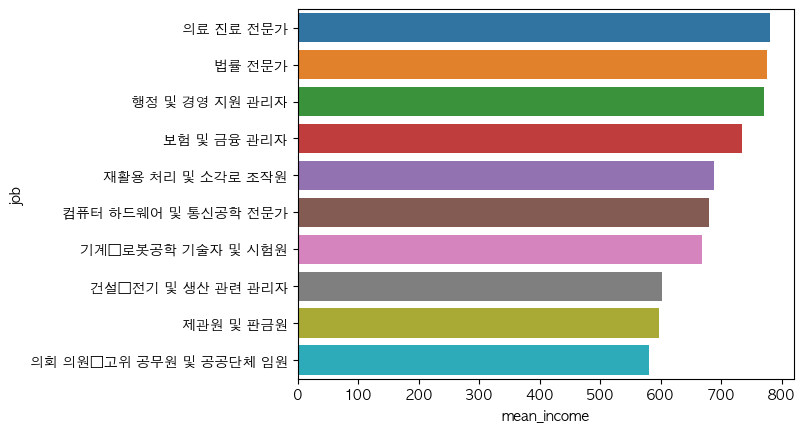

In [28]:
# 막대 그래프 만들기
sns.barplot(data= top10, y='job', x='mean_income', hue='job')

In [29]:
# 상위 10위 추출
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/Users/heohyeonjun/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heohyeonjun/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0, flags=flags)


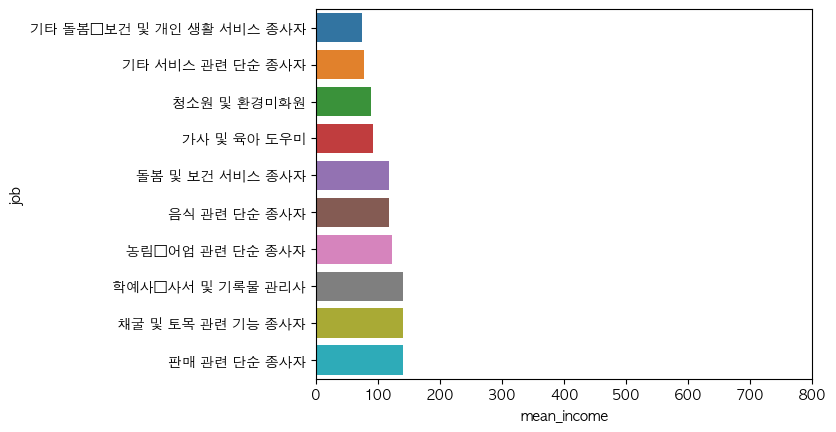

In [30]:
# 막대 그래프 만들기
sns.barplot(data= bottom10, y='job', x='mean_income', hue='job').set(xlim=(0,800))